# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type.  used combined data frame as ride did not list city type

ride_count = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_count.head()


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type-- need to use city dataframe as double counting using merged one and city type already included.  

driver_count = city_data_df.groupby(["type"]).sum()["driver_count"]
driver_count.head()





type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type.  used combined data frame as ride did not list city type



fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_total.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 

fare_average = pyber_data_df.groupby(["type"]).mean()["fare"]
fare_average.head()


type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 

mean_fares = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
mean_fares.head()


type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 


pyber_summary_df = pd.DataFrame({
               "Total Rides": ride_count,
               "Total Driver": driver_count,
               "Total Fares": fare_total,
               "Average Fare per Ride": fare_average,
                "Average Fare per Driver": mean_fares})

pyber_summary_df.head(15)

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Driver"] = pyber_summary_df["Total Driver"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df.head(15)

,Total Rides,Total Driver,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 0. Read the merged DataFrame, renumbered to align with instructions

pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,4/29/2019 17:04,13.38,8.550370e+12,6,Rural
2371,Lake Latoyabury,1/30/2019 0:05,20.76,9.018730e+12,2,Rural
2372,North Jaime,2/10/2019 21:03,11.11,2.781340e+12,1,Rural
2373,West Heather,5/7/2019 19:22,44.94,4.256850e+12,4,Rural


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares
#  for each date where the indices are the city type and date.  
# The original data file has seconds, but after I save it to my resources folder, the seconds get zeroed out and I am not sure why
#so that may be why 11 rows are dropped. my data was combined from 2375 rows down to 2364 rows.  


total_fare_by_date = pyber_data_df.groupby(["type","date"]).sum()["fare"]

total_fare_by_date



type   date           
Rural  1/1/2019 9:45      43.69
       1/11/2019 4:39     16.42
       1/14/2019 15:58    54.10
       1/14/2019 7:09     18.05
       1/15/2019 21:44    30.26
                          ...  
Urban  5/8/2019 1:54      32.69
       5/8/2019 2:31      41.33
       5/8/2019 4:20      21.99
       5/8/2019 4:39      18.45
       5/8/2019 7:29      18.55
Name: fare, Length: 2364, dtype: float64

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.

total_fare_by_date = total_fare_by_date.reset_index()

total_fare_by_date


,type,date,fare
0,Rural,1/1/2019 9:45,43.69
1,Rural,1/11/2019 4:39,16.42
2,Rural,1/14/2019 15:58,54.10
3,Rural,1/14/2019 7:09,18.05
4,Rural,1/15/2019 21:44,30.26
...,...,...,...
2359,Urban,5/8/2019 1:54,32.69
2360,Urban,5/8/2019 2:31,41.33
2361,Urban,5/8/2019 4:20,21.99
2362,Urban,5/8/2019 4:39,18.45


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 

pivot_table = total_fare_by_date.pivot(index="date", columns="type", values="fare")

pivot_table



type,Rural,Suburban,Urban
date,,,
1/1/2019 0:08,NaN,NaN,37.91
1/1/2019 0:46,NaN,47.74,NaN
1/1/2019 12:32,NaN,25.56,NaN
1/1/2019 14:40,NaN,NaN,5.42
1/1/2019 14:42,NaN,NaN,12.31
...,...,...,...
5/8/2019 1:54,NaN,NaN,32.69
5/8/2019 2:31,NaN,NaN,41.33
5/8/2019 4:20,NaN,NaN,21.99


In [15]:
#  tried moving step #5 up earlier because the date field didn't look consistent with what was in the U of M bootcamp sample pics
# at step 3 (mine lines month first, but guide lists year first) - just in case this difference caused issues with next step
# where I am doing a range from the date field (starting with year)

pivot_table.index= pd.to_datetime(pivot_table.index)

pivot_table


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [16]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# Google:  Using a DatetimeIndex: If you are going to do a lot of selections by date, it may be quicker 
# to set the date column as the index first. Then you can select rows by date using df.loc[start_date:end_date].
# https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

pivot_table_loc = pivot_table.loc['2019-01-01':'2019-04-28']

pivot_table_loc.head()


C:\Users\m046375\AppData\Local\Temp/ipykernel_16328/3889569052.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  pivot_table_loc = pivot_table.loc['2019-01-01':'2019-04-28']


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [17]:
pivot_table_loc.tail()

type,Rural,Suburban,Urban
date,,,
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36
2019-04-09 08:47:00,NaN,NaN,4.95
2019-04-09 09:17:00,NaN,NaN,20.31


In [18]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

pivot_table_loc.index= pd.to_datetime(pivot_table_loc.index)

In [19]:
# 6. Check that the datatype for the index is datetime using df.info()
pivot_table_loc.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [20]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#  Googled sample - monthly_resampled_data = df.close.resample('M').mean() 
# the above command will find the mean closing price - so if I want sum on weekly change M to W and mean to sum.....

resampled_pivot = pivot_table_loc.resample('W').sum()

resampled_pivot


type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


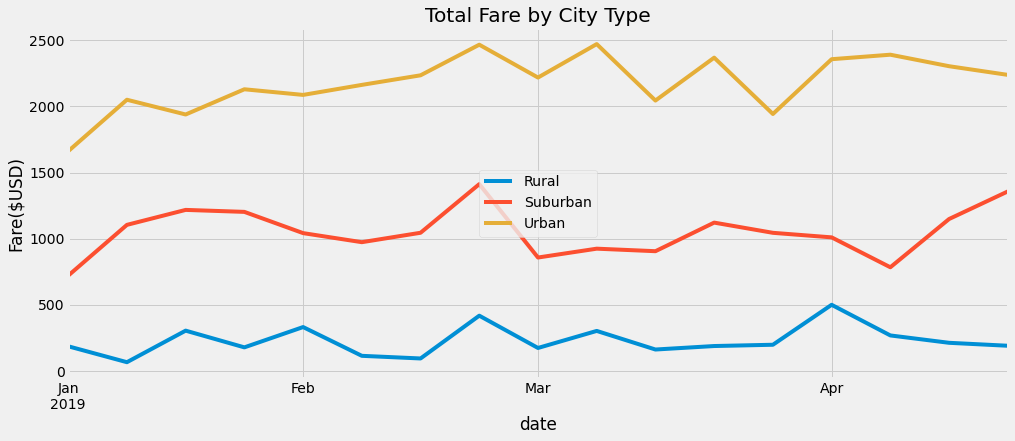

In [21]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

resampled_pivot.plot(figsize=(15,6))
plt.ylabel("Fare($USD)")
plt.title("Total Fare by City Type")

leg = plt.legend(loc = 'center')

plt.savefig("PyBer_fare_summary.png")

